# Heart Desease II - Decision Tree vs Random Forest

by Raphael Nussbaumer, Laurin Mühlebach, Lionel Nyffeler

### 1 Import <div id="heading--1"/>

#### 1.1 Basic Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#### 1.2 Importing the Dataset

In [2]:
HD = pd.read_csv('HeartDisease.csv', sep=',')

In [3]:
HD.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 2 Dataset Description

In [4]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  class     297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [5]:
print('The shape of the Dataset is: ', HD.shape)

The shape of the Dataset is:  (297, 14)


In [6]:
HD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
#find out number of NULL Values:
HD.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [8]:
corr_matrix = HD.corr()
corr_matrix.style.background_gradient(cmap='YlOrRd')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


In [9]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [10]:
HD["class"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

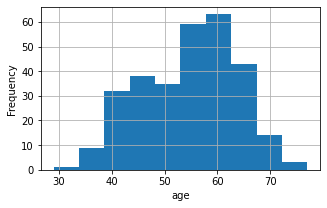

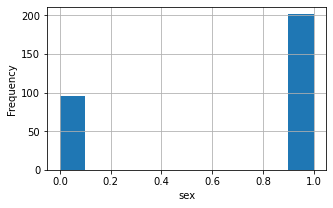

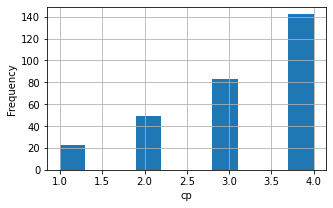

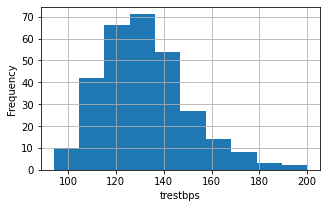

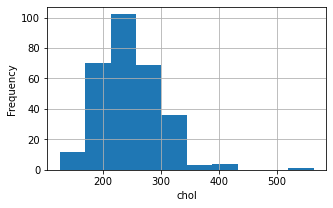

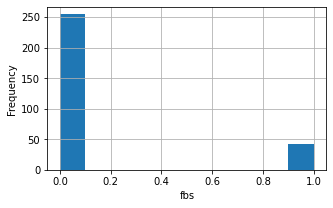

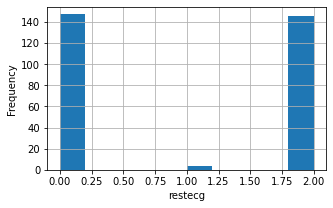

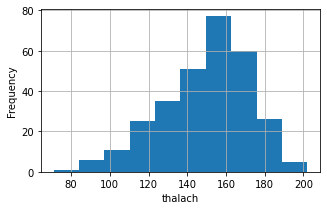

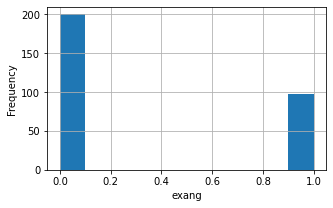

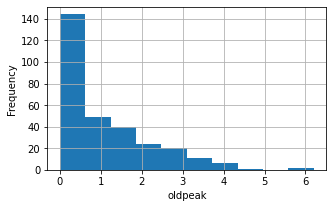

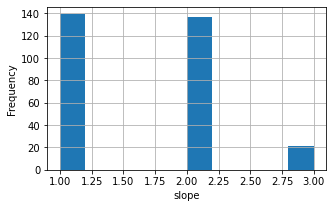

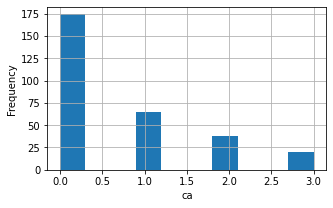

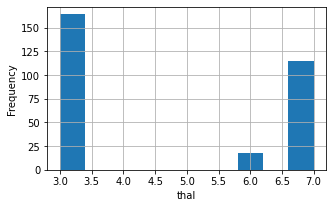

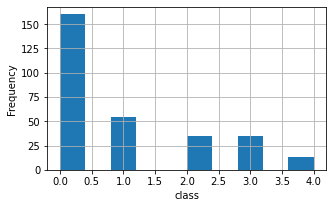

In [11]:
for i in range (0, len(HD.columns)):
    HD[HD.columns[i]].plot(kind = 'hist', grid = True, figsize = (5, 3))
    plt.xlabel(HD.columns[i])
    plt.ylabel('Frequency')
    plt.show()

### 3 Normalize the Dataset

Decision Trees can handle all handles without Normalization. Therefore no adjustments to the data has been applied.

### 4 Split the Dataset in Multiclass and Binary

Add new Column "Class Binary" which is derived from the "Class" > 0

In [12]:
HD["class binary"] = np.where(HD["class"] > 0, 1, 0)
HD.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,class binary
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


#### 4.1 Multiclass

For Multiclass we drop "Class Binary" and rename "Class" to "Class Multi"

In [13]:
HD_multi = HD.drop('class binary', axis=1)
HD_multi.rename(columns={'class': 'class multi'}, inplace=True)
HD_multi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class multi
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


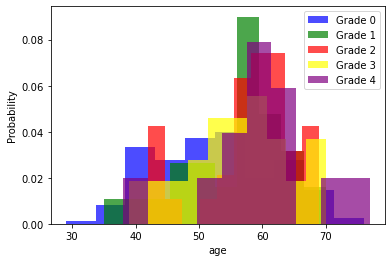

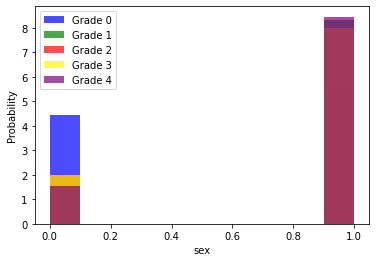

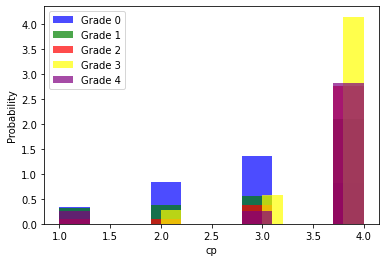

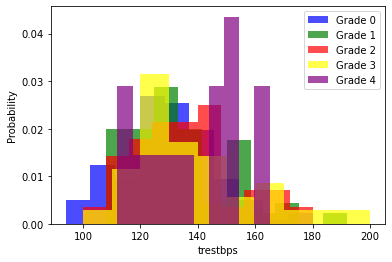

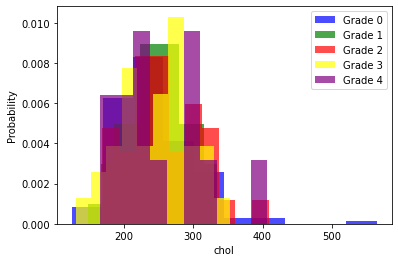

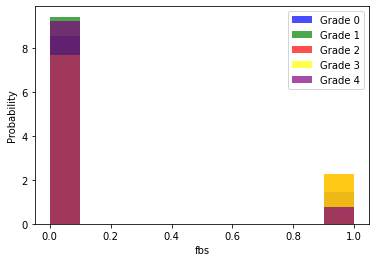

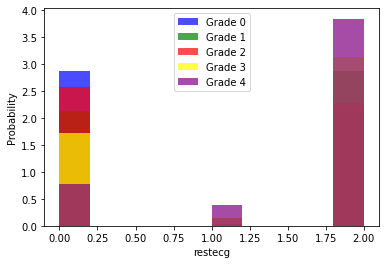

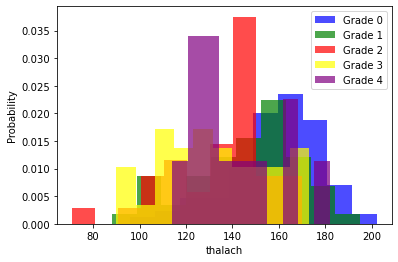

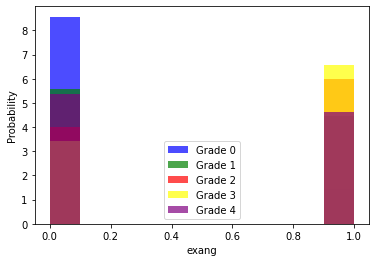

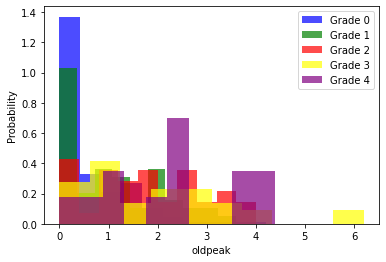

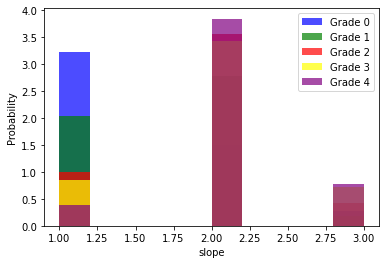

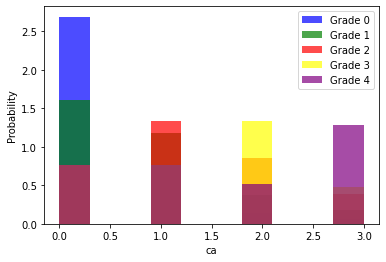

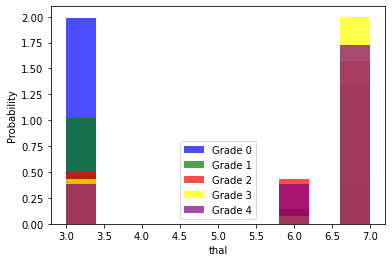

In [14]:
for i in cols[:]: 
    plt.hist(HD[HD["class"]==0][i], color='blue', label='Grade 0', alpha=0.7, density=True)
    plt.hist(HD[HD["class"]==1][i], color='green', label='Grade 1', alpha=0.7, density=True)
    plt.hist(HD[HD["class"]==2][i], color='red', label='Grade 2', alpha=0.7, density=True)
    plt.hist(HD[HD["class"]==3][i], color='yellow', label='Grade 3', alpha=0.7, density=True)
    plt.hist(HD[HD["class"]==4][i], color='purple', label='Grade 4', alpha=0.7, density=True)
    plt.xlabel(i)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

#### 4.2 Binary

We drop "Class", because "Class Binary" is already available

In [15]:
HD_binary = HD.drop('class', axis=1)
HD_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class binary
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


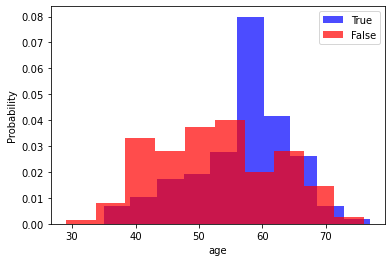

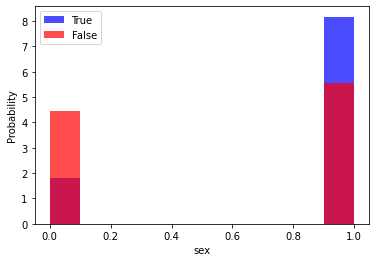

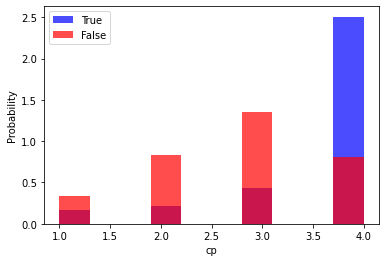

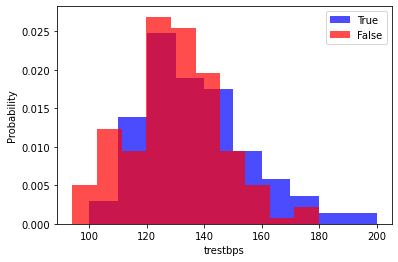

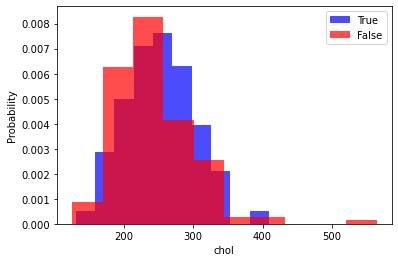

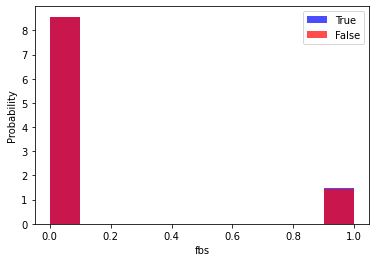

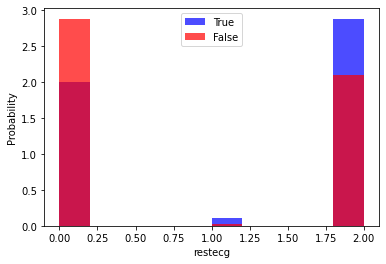

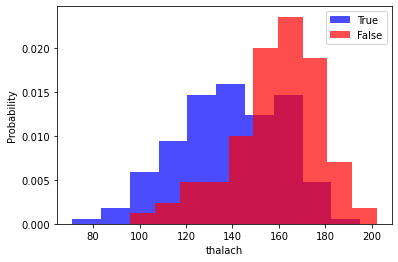

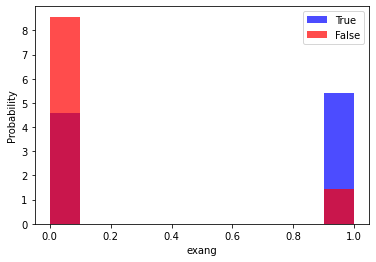

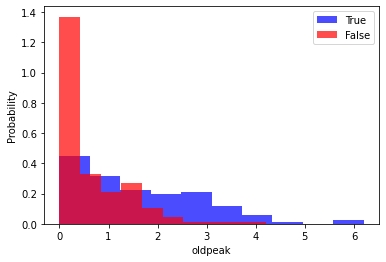

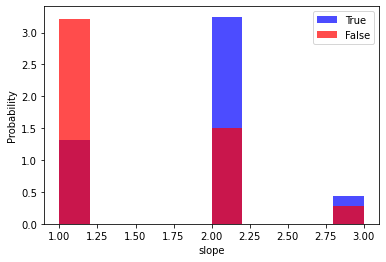

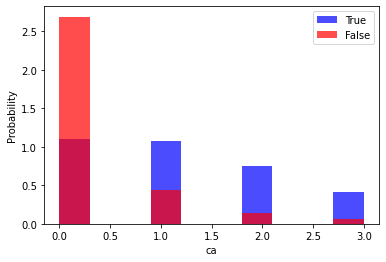

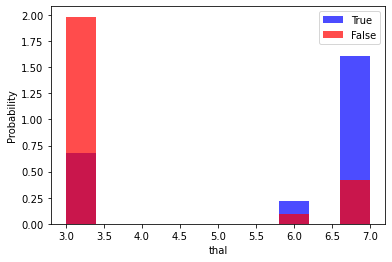

In [16]:
for i in cols[:]: 
    plt.hist(HD[HD["class binary"]==1][i], color='blue', label='True', alpha=0.7, density=True)
    plt.hist(HD[HD["class binary"]==0][i], color='red', label='False', alpha=0.7, density=True)
    plt.xlabel(i)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

### 5 Define X & Y and Features & Classnames

We define the x Table and y Table
- x Table contains all features (without the outcome)
- y Table only contains the Outcome

#### 5.1 Multi

In [17]:
x_multi = HD_multi.drop('class multi', axis=1)       # features
y_multi = HD_multi['class multi']                    # labels

In [18]:
x_multi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [19]:
y_multi.head()

0    0
1    2
2    1
3    0
4    0
Name: class multi, dtype: int64

#### 5.2 Binary

We define the x Table and y Table
- x Table contains all features (without the outcome)
- y Table only contains the Outcome

In [20]:
x_binary = HD_binary.drop('class binary', axis=1)       # features
y_binary = HD_binary['class binary']                    # labels

In [21]:
x_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [22]:
y_binary.head()

0    0
1    1
2    1
3    0
4    0
Name: class binary, dtype: int32

#### 5.3 Features

In [23]:
features_names = x_multi.columns
features_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

#### 5.4 Classnames

In [24]:
classnames_binary = ['0', '1']
classnames_multi = ['0', '1', '2', '3', '4']

### 6 Analysis of the different classes

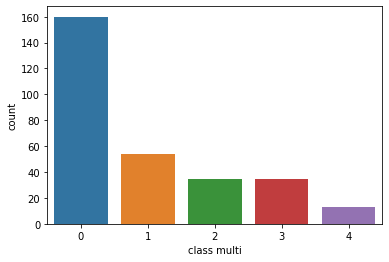

In [25]:
sns.countplot(y_multi);

In [26]:
print('The percentage of 0 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==0])/len(y_multi)*100), '%')
print('The percentage of 1 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==1])/len(y_multi)*100), '%')
print('The percentage of 2 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==2])/len(y_multi)*100), '%')
print('The percentage of 3 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==3])/len(y_multi)*100), '%')
print('The percentage of 4 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==4])/len(y_multi)*100), '%')

The percentage of 0 is: 53.87 %
The percentage of 1 is: 18.18 %
The percentage of 2 is: 11.78 %
The percentage of 3 is: 11.78 %
The percentage of 4 is: 4.38 %


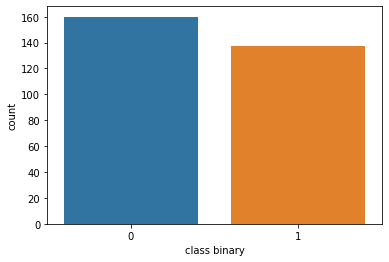

In [27]:
sns.countplot(y_binary);

In [28]:
print('The percentage of 0 is:', '{:.2f}'.format(len(HD_binary[HD_binary['class binary']==0])/len(y_binary)*100), '%')
print('The percentage of 1 is:', '{:.2f}'.format(len(HD_binary[HD_binary['class binary']==1])/len(y_binary)*100), '%')

The percentage of 0 is: 53.87 %
The percentage of 1 is: 46.13 %


### 7 Split the Dataset into Train-Test

#### 7.1 Multi

In [29]:
from sklearn.model_selection import train_test_split

#split in Train (0.7) & in Test (0.3)
# random_state means the code will always have the same training set (in order to reproduce results)
x_multi_train, x_multi_test, y_multi_train, y_multi_test = train_test_split(x_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi)

In [30]:
#Quick check if the split is correct:
print("Shape of x_multi_train             : "+str(x_multi_train.shape))
print("Shape of x_multi_test              : "+str(x_multi_test.shape))
print("Shape of y_multi_train             : "+str(y_multi_train.shape))
print("Shape of y_multi_test              : "+str(y_multi_test.shape))
print('')
print("Lenght of Dataset                  : ", len(x_multi))
print("Percentage of Train_multi          : ", '{:.2f}'.format(len(x_multi_train)/len(x_multi)*100), '%')
print("Percentage of Test_multi           : ", '{:.2f}'.format(len(x_multi_test)/len(x_multi)*100), '%')

Shape of x_multi_train             : (207, 13)
Shape of x_multi_test              : (90, 13)
Shape of y_multi_train             : (207,)
Shape of y_multi_test              : (90,)

Lenght of Dataset                  :  297
Percentage of Train_multi          :  69.70 %
Percentage of Test_multi           :  30.30 %


#### 7.2 Binary

In [31]:
from sklearn.model_selection import train_test_split

#Split in Train (0.7) & in Test (0.3)
#random_state means the code will always have the same training set (in order to reproduce results)
x_binary_train, x_binary_test, y_binary_train, y_binary_test = train_test_split(x_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

In [32]:
#Quick check if the split is correct:
print("Shape of x_binary_train             : "+str(x_binary_train.shape))
print("Shape of x_binary_test              : "+str(x_binary_test.shape))
print("Shape of y_binary_train             : "+str(y_binary_train.shape))
print("Shape of y_binary_test              : "+str(y_binary_test.shape))
print('')
print("Lenght of Dataset                   : ", len(x_binary))
print("Percentage of Train_binary          : ", '{:.2f}'.format(len(x_binary_train)/len(x_binary)*100), '%')
print("Percentage of Test_binary           : ", '{:.2f}'.format(len(x_binary_test)/len(x_binary)*100), '%')

Shape of x_binary_train             : (207, 13)
Shape of x_binary_test              : (90, 13)
Shape of y_binary_train             : (207,)
Shape of y_binary_test              : (90,)

Lenght of Dataset                   :  297
Percentage of Train_binary          :  69.70 %
Percentage of Test_binary           :  30.30 %


### 8 Implementing the Models

Overview of the applied Models:

        8.1 Decision Tree Binary:
                
                8.1.1 Basic Decision Tree -> Train & Test + Max Depth = 3
                8.1.2 Decision Tree mit Cross Validation (KFold: Hyperparameter Tuning)
        8.2 Decision Tree Multiclass:
                
                8.2.1 Basic Decision Tree -> Train & Test + Max Depth = 3
                8.2.2 Decision Tree mit Cross Validation (KFold: Hyperparameter Tuning)
        8.3 Random Forest mit Binary:

                8.3.1 Basic Random Forest  -> Train & Test + Max Depth = 3
                8.3.2 Random Forest mit Cross Validation (KFold: Hyperparameter Tuning)
        8.4 Random Forest mit Multiclass:
        
                8.4.1 Basic Random Forest  -> Train & Test + Max Depth = 3
                8.4.2 Random Forest mit Cross Validation (KFold: Hyperparameter Tuning)

We use the following Model Abbreviations:
- dtb_basic (Decision Tree Binary Basic)
- dtb_cv (Decision Tree Binary Cross Validation)
- dtm_basic (Decision Tree Multiclass Basic)
- dtm_cv (Decision Tree Multiclass Cross Validation)
- rfb_basic (Random Forest Binary Basic)
- rfb_cv (Random Forest Binary Cross Validation)
- rfm_basic (Random Forest Mutliclass Basic)
- rfm_cv (Random Forest Multiclass Cross Validation)

For each applied Model we will save the following Performance Metrics:
- Model
- Max Depth
- criterion
- min_samples_split
- max_features
- class_weight
- Accuracy in Sample
- Accuracy out of Sample
- Precision Score
- Recall Score
- F1 Score

#### 8.1 Decision Tree Binary

##### 8.1.1 Decision Tree Binary (dtb_basic)

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtb_basic = DecisionTreeClassifier(max_depth=3, random_state=2, max_features='sqrt')
dtb_basic.fit(x_binary_train, y_binary_train);

In [34]:
from sklearn.metrics import classification_report

y_predict = dtb_basic.predict(x_binary_test)
dtb_basic_report = classification_report(y_binary_test, y_predict, output_dict=True, digits=3)
print(classification_report(y_binary_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.820     0.854     0.837        48
           1      0.825     0.786     0.805        42

    accuracy                          0.822        90
   macro avg      0.823     0.820     0.821        90
weighted avg      0.822     0.822     0.822        90



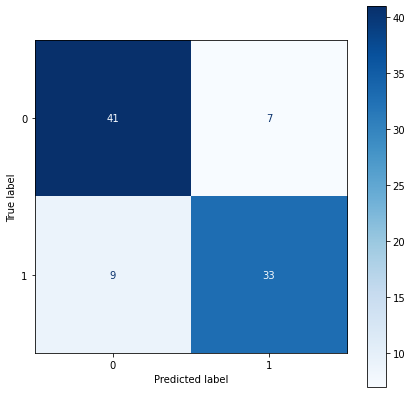

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_binary_test, y_predict)

fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(dtb_basic, x_binary_test, y_binary_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
model = 'dtb_basic'
max_depth = 3
criterion = 'gini (Default)'
min_samples_split = 2
max_features = 'sqrt (Default)'
class_weight = 'None'

accuracy_in_sample = dtb_basic.score(x_binary_train, y_binary_train)
accuracy_out_sample = dtb_basic.score(x_binary_test, y_binary_test)
Precision = dtb_basic_report['weighted avg']['precision'] 
Recall = dtb_basic_report['weighted avg']['recall']
F1 = dtb_basic_report['weighted avg']['f1-score']

dtb_basic_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1, criterion, min_samples_split, max_features, class_weight )]
dtb_basic_results = pd.DataFrame(dtb_basic_temp)
dtb_basic_results.rename(columns={0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1', 7:'criterion', 8:'min_samples_split', 9:'max_features', 10:'class_weight'}, inplace = True)
dtb_basic_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1,criterion,min_samples_split,max_features,class_weight
0,dtb_basic,3,0.78744,0.822222,0.822333,0.822222,0.821868,gini (Default),2,sqrt (Default),None


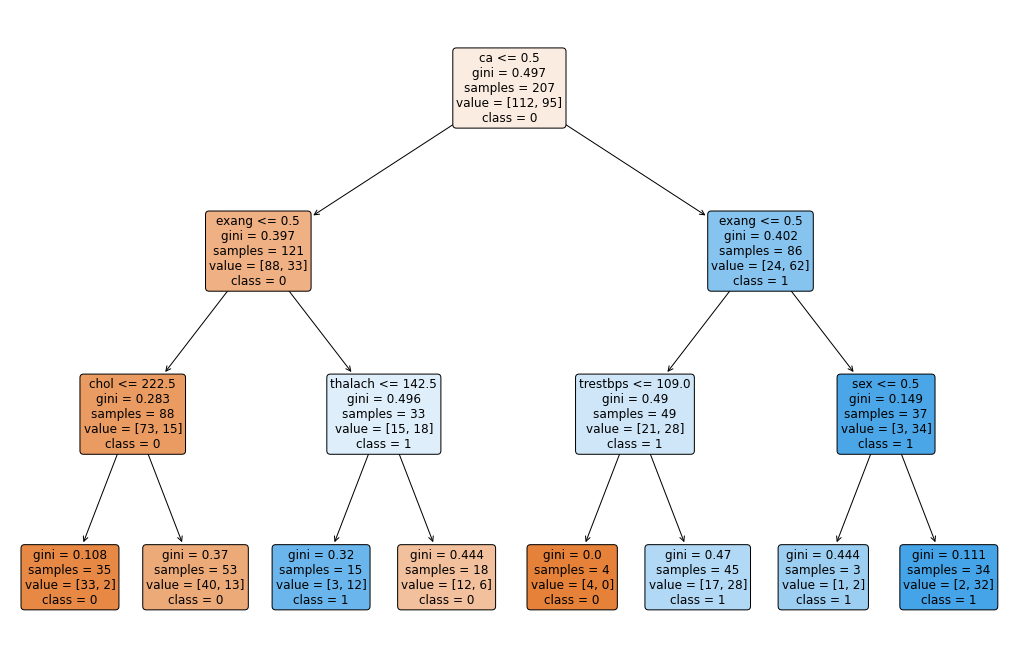

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize = (18, 12))
plot_tree(dtb_basic, filled = True, rounded = True, feature_names = features_names, fontsize = 12, class_names = classnames_binary)
plt.show()

##### 8.1.2 Decision Tree Binary with Cross Validation (dtb_cv)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

df_classifier = DecisionTreeClassifier(random_state=2)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 20],
             'min_samples_split': [2, 3, 4, 5, 6, 10],
             'max_features': ['sqrt','log2'],
             'class_weight': ['balanced']}

dtb_cv = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, #output Messages
                     scoring='recall_weighted')

dtb_cv.fit(x_binary_train, y_binary_train)
print('Best Model:')
print(dtb_cv.best_params_)
print('Best Score:')
print(dtb_cv.best_score_)

Fitting 15 folds for each of 336 candidates, totalling 5040 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Model:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10}
Best Score:
0.7555168408826946


[Parallel(n_jobs=1)]: Done 5040 out of 5040 | elapsed:   34.2s finished


In [39]:
# Save all Search Parameters
dtb_cv_sp = pd.DataFrame(dtb_cv.cv_results_)
dtb_cv_sp['model'] = 'dtb_cv'
dtb_cv_sp = dtb_cv_sp[['model','param_criterion','param_max_depth', 'param_max_features', 'param_min_samples_split','mean_test_score','rank_test_score',]]

In [40]:
dtb_cv_best = DecisionTreeClassifier(random_state=2, **dtb_cv.best_params_).fit(x_binary_train, y_binary_train)
y_pred = dtb_cv_best.predict(x_binary_test)
dtb_cv_report = classification_report(y_binary_test,y_pred, digits=3, output_dict=True)
print(classification_report(y_binary_test,y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.778     0.875     0.824        48
           1      0.833     0.714     0.769        42

    accuracy                          0.800        90
   macro avg      0.806     0.795     0.796        90
weighted avg      0.804     0.800     0.798        90



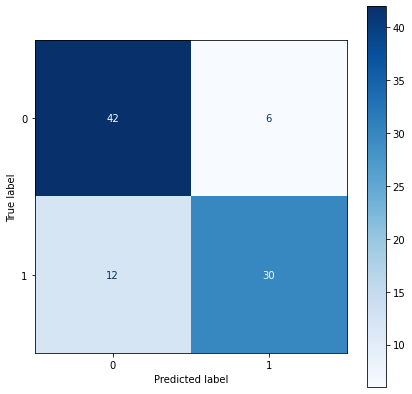

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(dtb_cv_best, x_binary_test, y_binary_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [42]:
model = 'dtb_cv'
max_depth = dtb_cv.best_params_['max_depth']
criterion = dtb_cv.best_params_['criterion']
min_samples_split = dtb_cv.best_params_['min_samples_split']
max_features = dtb_cv.best_params_['max_features']
class_weight = dtb_cv.best_params_['class_weight']

accuracy_in_sample = dtb_cv.best_score_ 
accuracy_out_sample = dtb_cv_best.score(x_binary_test, y_binary_test)
Precision = dtb_cv_report['weighted avg']['precision'] 
Recall = dtb_cv_report['weighted avg']['recall']
F1 = dtb_cv_report['weighted avg']['f1-score']

dtb_cv_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1, criterion, min_samples_split, max_features, class_weight )]
dtb_cv_results = pd.DataFrame(dtb_cv_temp)
dtb_cv_results.rename(columns={0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1', 7:'criterion', 8:'min_samples_split', 9:'max_features', 10:'class_weight'}, inplace = True)
dtb_cv_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1,criterion,min_samples_split,max_features,class_weight
0,dtb_cv,5,0.755517,0.8,0.803704,0.8,0.79819,entropy,10,sqrt,balanced


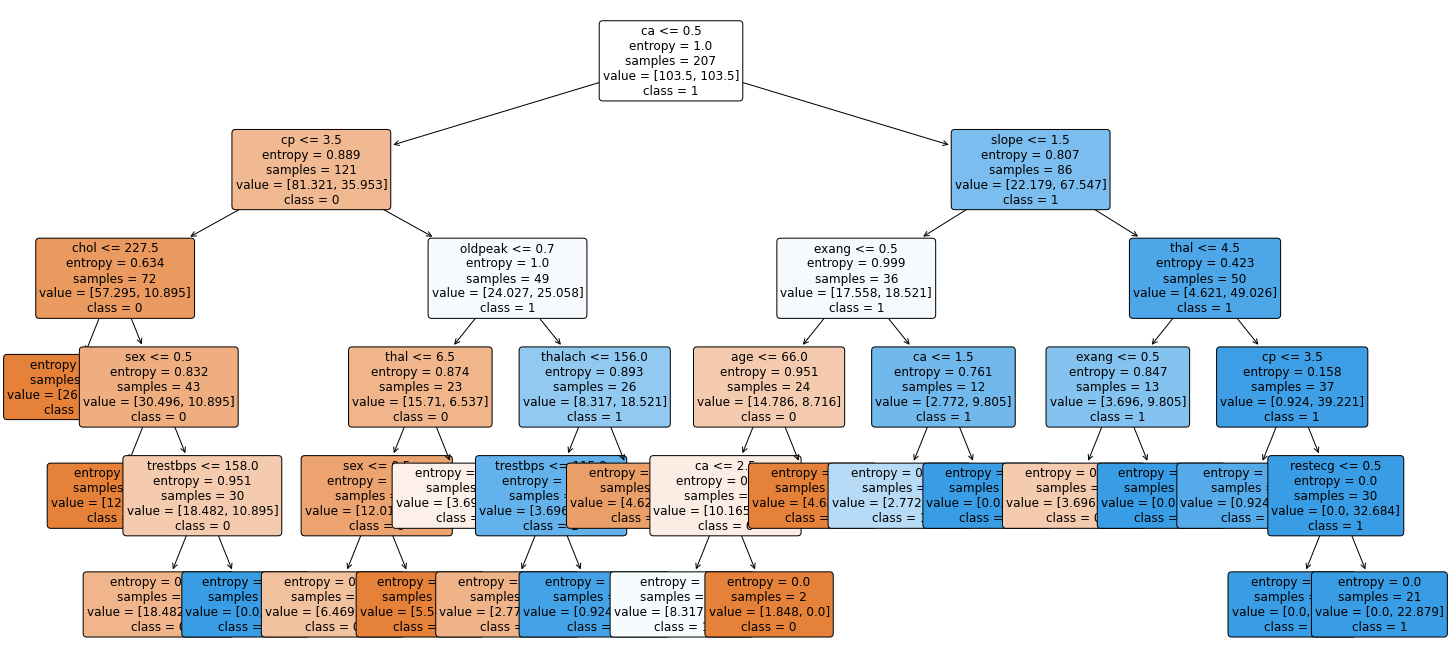

In [43]:
from sklearn.tree import plot_tree

classnames = classnames_binary
plt.figure(figsize = (25, 12))
plot_tree(dtb_cv_best, filled = True, rounded = True, feature_names = features_names, fontsize = 12, class_names = classnames)
plt.show()

#### 8.2 Decision Tree Multiclass

##### 8.2.1 Decision Tree Basic (dtm_basic)

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtm_basic = DecisionTreeClassifier(max_depth=3, random_state=2, max_features='sqrt')
dtm_basic.fit(x_multi_train, y_multi_train);

In [45]:
from sklearn.metrics import classification_report, accuracy_score

y_predict = dtm_basic.predict(x_multi_test)
dtm_basic_report = classification_report(y_multi_test, y_predict, output_dict=True, digits=3)
print(classification_report(y_multi_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.667     0.958     0.786        48
           1      0.200     0.062     0.095        16
           2      0.250     0.091     0.133        11
           3      0.250     0.273     0.261        11
           4      0.000     0.000     0.000         4

    accuracy                          0.567        90
   macro avg      0.273     0.277     0.255        90
weighted avg      0.452     0.567     0.484        90



c:\Users\lione\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


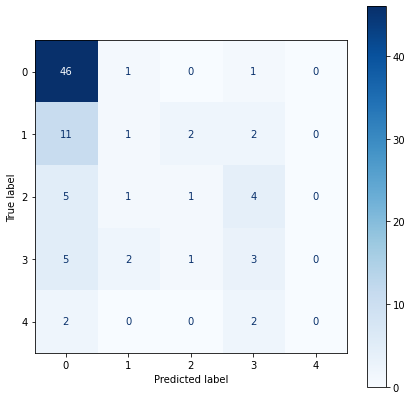

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(dtm_basic, x_multi_test, y_multi_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [47]:
model = 'dtm_basic'
max_depth = 3
criterion = 'gini (Default)'
min_samples_split = 2
max_features = 'sqrt (Default)'
class_weight = 'None'

accuracy_in_sample = dtm_basic.score(x_multi_train, y_multi_train)
accuracy_out_sample = dtm_basic.score(x_multi_test, y_multi_test)
Precision = dtm_basic_report['weighted avg']['precision'] 
Recall = dtm_basic_report['weighted avg']['recall']
F1 = dtm_basic_report['weighted avg']['f1-score']

dtm_basic_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1, criterion, min_samples_split, max_features, class_weight )]
dtm_basic_results = pd.DataFrame(dtm_basic_temp)
dtm_basic_results.rename(columns={0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1', 7:'criterion', 8:'min_samples_split', 9:'max_features', 10:'class_weight'}, inplace = True)
dtm_basic_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1,criterion,min_samples_split,max_features,class_weight
0,dtm_basic,3,0.599034,0.566667,0.452222,0.566667,0.484485,gini (Default),2,sqrt (Default),None


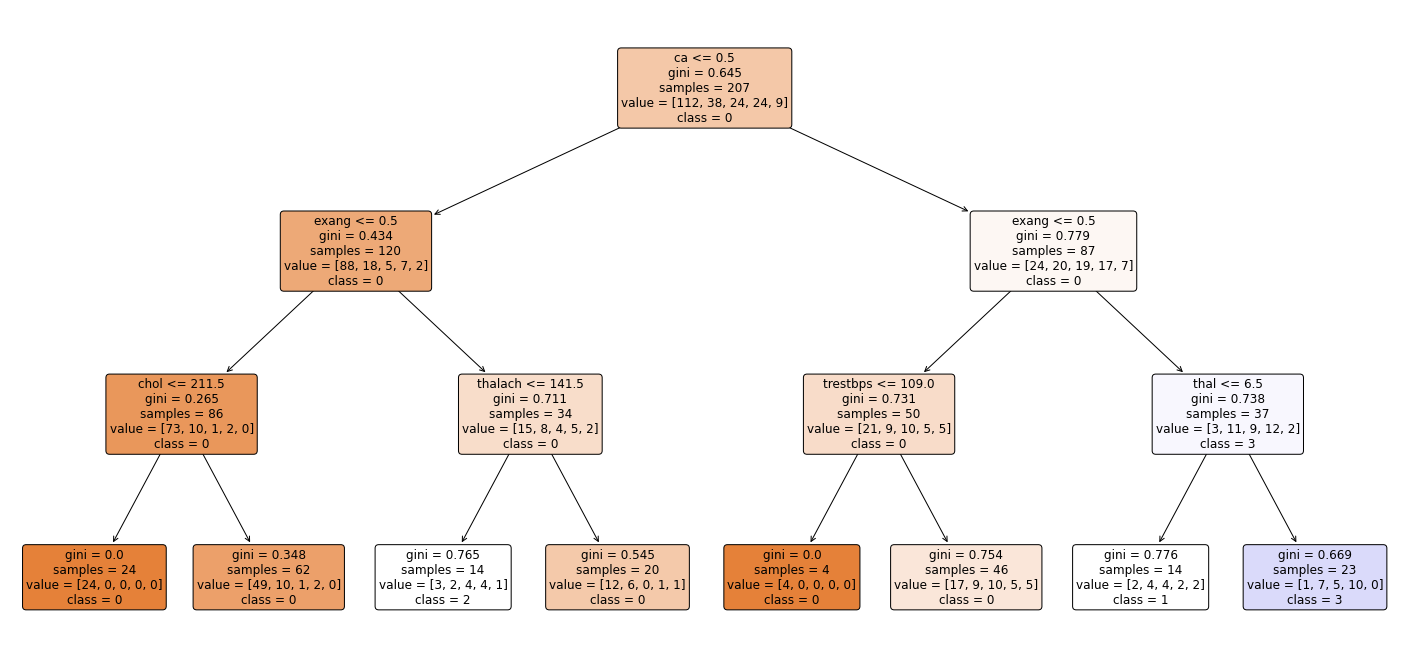

In [48]:
from sklearn.tree import plot_tree

classnames = classnames_multi
plt.figure(figsize = (25, 12))
plot_tree(dtm_basic, filled = True, rounded = True, feature_names = features_names, fontsize = 12, class_names = classnames)
plt.show()

##### 8.2.2 Decision Tree Multiclass Cross Validation (dtm_cv)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

df_classifier = DecisionTreeClassifier(random_state=2)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 20],
             'min_samples_split': [2, 3, 4, 5, 6, 10],
             'max_features': ['sqrt','log2'],
             'class_weight': ['balanced']}

dtm_cv = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, #output Messages
                     scoring='recall_weighted'
                     )

dtm_cv.fit(x_multi_train, y_multi_train)
print('Best Model:')
print(dtm_cv.best_params_)
print('Best Score:')
print(dtm_cv.best_score_)

Fitting 15 folds for each of 336 candidates, totalling 5040 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Model:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 13, 'max_features': 'sqrt', 'min_samples_split': 2}
Best Score:
0.5121176926054976


[Parallel(n_jobs=1)]: Done 5040 out of 5040 | elapsed:   35.3s finished


In [50]:
# Save all Search Parameters
dtm_cv_sp = pd.DataFrame(dtm_cv.cv_results_)
dtm_cv_sp['model'] = 'dtm_cv'
dtm_cv_sp = dtm_cv_sp[['model','param_criterion','param_max_depth', 'param_max_features', 'param_min_samples_split','mean_test_score','rank_test_score',]]

In [51]:
dtm_cv_best = DecisionTreeClassifier(random_state=2, **dtm_cv.best_params_).fit(x_multi_train, y_multi_train)
y_pred = dtm_cv.predict(x_multi_test)
dtm_cv_report = classification_report(y_multi_test, y_pred, output_dict=True, digits=3)
print(classification_report(y_multi_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.783     0.750     0.766        48
           1      0.250     0.375     0.300        16
           2      0.500     0.182     0.267        11
           3      0.333     0.364     0.348        11
           4      0.000     0.000     0.000         4

    accuracy                          0.533        90
   macro avg      0.373     0.334     0.336        90
weighted avg      0.564     0.533     0.537        90



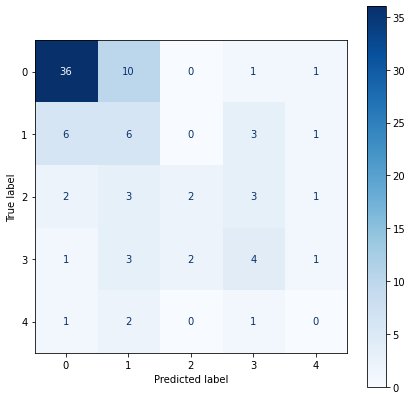

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(dtm_cv_best, x_multi_test, y_multi_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [53]:
model = 'dtm_cv'
max_depth = dtm_cv.best_params_['max_depth']
criterion = dtm_cv.best_params_['criterion']
min_samples_split = dtm_cv.best_params_['min_samples_split']
max_features = dtm_cv.best_params_['max_features']
class_weight = dtm_cv.best_params_['class_weight']

accuracy_in_sample = dtm_cv.best_score_ 
accuracy_out_sample = dtm_cv_best.score(x_multi_test, y_multi_test)
Precision = dtm_cv_report['weighted avg']['precision'] 
Recall = dtm_cv_report['weighted avg']['recall']
F1 = dtm_cv_report['weighted avg']['f1-score']

dtm_cv_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1, criterion, min_samples_split, max_features, class_weight )]
dtm_cv_results = pd.DataFrame(dtm_cv_temp)
dtm_cv_results.rename(columns={0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1', 7:'criterion', 8:'min_samples_split', 9:'max_features', 10:'class_weight'}, inplace = True)
dtm_cv_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1,criterion,min_samples_split,max_features,class_weight
0,dtm_cv,13,0.512118,0.533333,0.563688,0.533333,0.536949,gini,2,sqrt,balanced


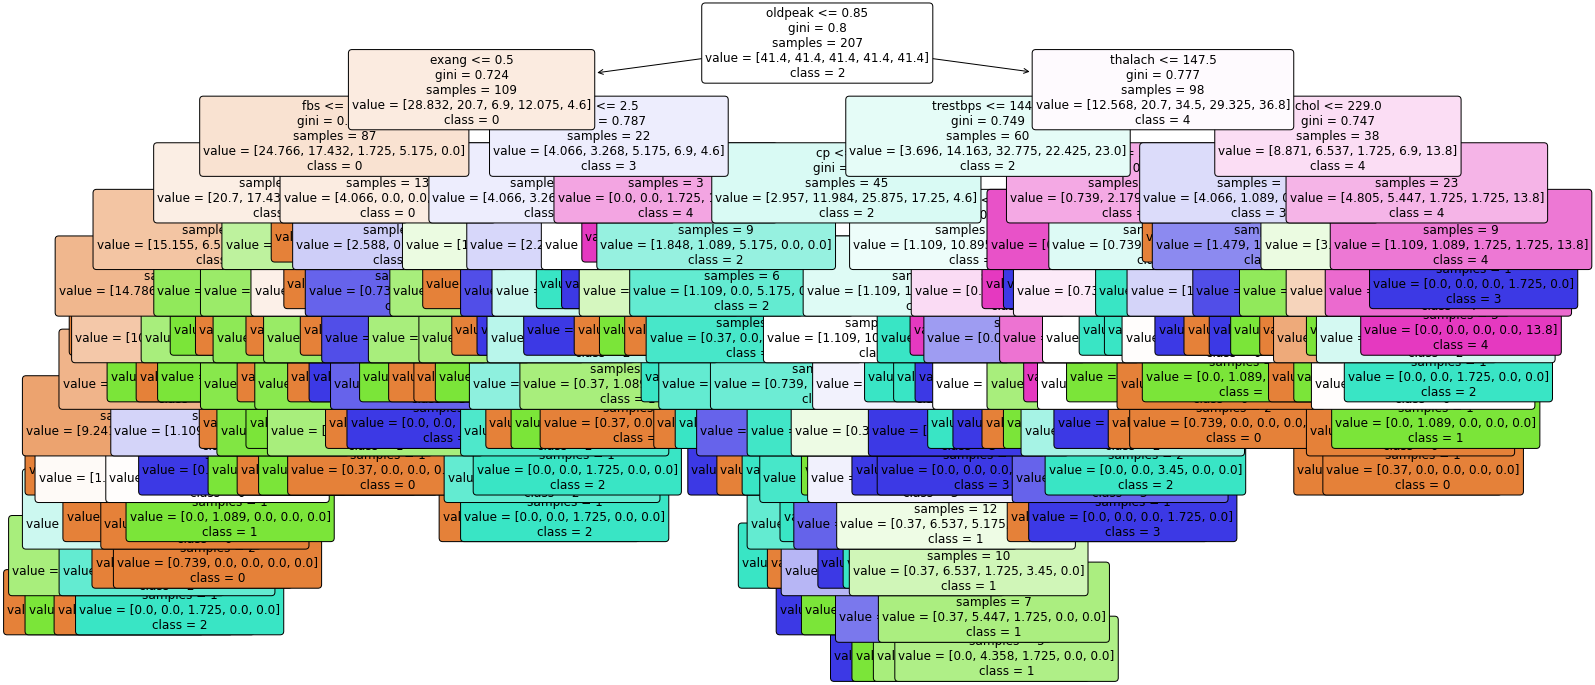

In [54]:
from sklearn.tree import plot_tree

classnames = classnames_multi
plt.figure(figsize = (25, 12))
plot_tree(dtm_cv_best, filled = True, rounded = True, feature_names = features_names, fontsize = 12, class_names = classnames)
plt.show()

#### 8.3 Random Forest Binary (rfb)

##### 8.3.1 Random Forest Binary Basic (rfb_basic)

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfb_basic = RandomForestClassifier(max_depth=3, random_state=2)
rfb_basic.fit(x_binary_train, y_binary_train);

In [56]:
from sklearn.metrics import classification_report, accuracy_score

y_predict = rfb_basic.predict(x_binary_test)
rfb_basic_report = classification_report(y_binary_test, y_predict, output_dict=True, digits=3)
print(classification_report(y_binary_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.800     0.917     0.854        48
           1      0.886     0.738     0.805        42

    accuracy                          0.833        90
   macro avg      0.843     0.827     0.830        90
weighted avg      0.840     0.833     0.831        90



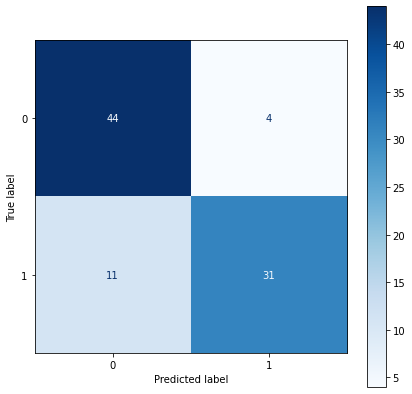

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(rfb_basic, x_binary_test, y_binary_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [58]:
model = 'rfb_basic'
max_depth = 3
criterion = 'gini (Default)'
min_samples_split = 2
max_features = 'sqrt (Default)'
class_weight = 'None'

accuracy_in_sample = rfb_basic.score(x_binary_train, y_binary_train)
accuracy_out_sample = rfb_basic.score(x_binary_test, y_binary_test)
Precision = rfb_basic_report['weighted avg']['precision'] 
Recall = rfb_basic_report['weighted avg']['recall']
F1 = rfb_basic_report['weighted avg']['f1-score']

rfb_basic_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1, criterion, min_samples_split, max_features, class_weight )]
rfb_basic_results = pd.DataFrame(rfb_basic_temp)
rfb_basic_results.rename(columns={0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1', 7:'criterion', 8:'min_samples_split', 9:'max_features', 10:'class_weight'}, inplace = True)
rfb_basic_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1,criterion,min_samples_split,max_features,class_weight
0,rfb_basic,3,0.879227,0.833333,0.84,0.833333,0.831421,gini (Default),2,sqrt (Default),None


##### 8.3.2 Random Forest Binary mit CV (rfb_cv)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

rfb_cv = RandomForestClassifier(random_state=2)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 20],
             'min_samples_split': [2, 3, 4, 5, 6, 10],
             'max_features': ['sqrt','log2'],
             'class_weight': ['balanced']}

rfb_cv = GridSearchCV(estimator=rfb_cv, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, #output Messages
                     scoring='recall_weighted')

rfb_cv.fit(x_binary_train, y_binary_train)
print('Best Model:')
print(rfb_cv.best_params_)
print('Best Score:')
print(rfb_cv.best_score_)

Fitting 15 folds for each of 336 candidates, totalling 5040 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Model:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 2}
Best Score:
0.8356949283778553


[Parallel(n_jobs=1)]: Done 5040 out of 5040 | elapsed: 13.7min finished


In [60]:
# Save all Search Parameters
rfb_cv_sp = pd.DataFrame(rfb_cv.cv_results_)
rfb_cv_sp['model'] = 'rfb_cv'
rfb_cv_sp = rfb_cv_sp[['model','param_criterion','param_max_depth', 'param_max_features', 'param_min_samples_split','mean_test_score','rank_test_score',]]

In [61]:
y_predict = rfb_cv.predict(x_binary_test)
rfb_cv_report = classification_report(y_binary_test, y_predict, output_dict=True, digits=3)
print(classification_report(y_binary_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.811     0.896     0.851        48
           1      0.865     0.762     0.810        42

    accuracy                          0.833        90
   macro avg      0.838     0.829     0.831        90
weighted avg      0.836     0.833     0.832        90



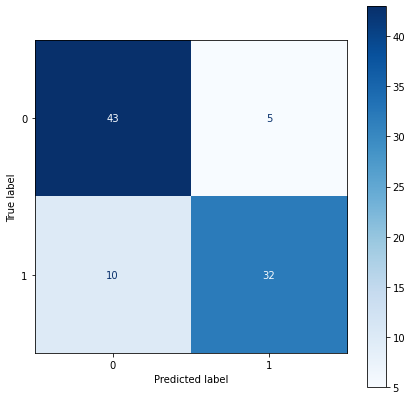

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(rfb_cv, x_binary_test, y_binary_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [63]:
model = 'rfb_cv'
max_depth = rfb_cv.best_params_['max_depth']
criterion = rfb_cv.best_params_['criterion']
min_samples_split = rfb_cv.best_params_['min_samples_split']
max_features = rfb_cv.best_params_['max_features']
class_weight = rfb_cv.best_params_['class_weight']

accuracy_in_sample = rfb_cv.best_score_ 
accuracy_out_sample = rfb_cv.score(x_binary_test, y_binary_test)
Precision = rfb_cv_report['weighted avg']['precision'] 
Recall = rfb_cv_report['weighted avg']['recall']
F1 = rfb_cv_report['weighted avg']['f1-score']

rfb_cv_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1, criterion, min_samples_split, max_features, class_weight )]
rfb_cv_results = pd.DataFrame(rfb_cv_temp)
rfb_cv_results.rename(columns={0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1', 7:'criterion', 8:'min_samples_split', 9:'max_features', 10:'class_weight'}, inplace = True)
rfb_cv_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1,criterion,min_samples_split,max_features,class_weight
0,rfb_cv,7,0.835695,0.833333,0.836308,0.833333,0.832184,entropy,2,sqrt,balanced


#### 8.4 Random Forest Multiclass (rfm)

##### 8.4.1 Random Forest Multi (rfm_basic)

In [64]:
from sklearn.ensemble import RandomForestClassifier

rfm_basic = RandomForestClassifier(max_depth=3, random_state=2)
rfm_basic.fit(x_multi_train, y_multi_train);

In [65]:
from sklearn.metrics import classification_report, accuracy_score

y_predict = rfm_basic.predict(x_multi_test)
rfm_basic_report = classification_report(y_multi_test, y_predict, output_dict=True, digits=3)
print(classification_report(y_multi_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.671     0.979     0.797        48
           1      0.000     0.000     0.000        16
           2      0.000     0.000     0.000        11
           3      0.333     0.364     0.348        11
           4      0.000     0.000     0.000         4

    accuracy                          0.567        90
   macro avg      0.201     0.269     0.229        90
weighted avg      0.399     0.567     0.467        90



c:\Users\lione\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


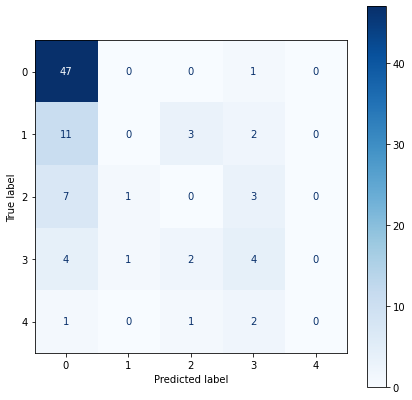

In [66]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(rfm_basic, x_multi_test, y_multi_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [67]:
model = 'rfm_basic'
max_depth = 3
criterion = 'gini (Default)'
min_samples_split = 2
max_features = 'sqrt (Default)'
class_weight = 'None'

accuracy_in_sample = rfm_basic.score(x_multi_train, y_multi_train)
accuracy_out_sample = rfm_basic.score(x_multi_test, y_multi_test)
Precision = rfm_basic_report['weighted avg']['precision'] 
Recall = rfm_basic_report['weighted avg']['recall']
F1 = rfm_basic_report['weighted avg']['f1-score']

rfm_basic_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1, criterion, min_samples_split, max_features, class_weight )]
rfm_basic_results= pd.DataFrame(rfm_basic_temp)
rfm_basic_results.rename(columns={0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1', 7:'criterion', 8:'min_samples_split', 9:'max_features', 10:'class_weight'}, inplace = True)
rfm_basic_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1,criterion,min_samples_split,max_features,class_weight
0,rfm_basic,3,0.705314,0.566667,0.398836,0.566667,0.467371,gini (Default),2,sqrt (Default),None


##### 8.4.2 Random Forest Multi mit CV (rfm_cv)

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

rfm_cv = RandomForestClassifier(random_state=2)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 20],
             'min_samples_split': [2, 3, 4, 5, 6, 10],
             'max_features': ['sqrt','log2'],
             'class_weight': ['balanced']}

rfm_cv = GridSearchCV(estimator=rfm_cv, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, #output Messages
                     scoring='recall_weighted')

rfm_cv.fit(x_multi_train, y_multi_train)
print('Best Model:')
print(rfm_cv.best_params_)
print('Best Score:')
print(rfm_cv.best_score_)

Fitting 15 folds for each of 336 candidates, totalling 5040 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Model:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_split': 4}
Best Score:
0.5991095625241966


[Parallel(n_jobs=1)]: Done 5040 out of 5040 | elapsed: 13.7min finished


In [69]:
# Save all Search Parameters
rfm_cv_sp = pd.DataFrame(rfm_cv.cv_results_)
rfm_cv_sp['model'] = 'rfm_cv'
rfm_cv_sp = rfm_cv_sp[['model','param_criterion','param_max_depth', 'param_max_features', 'param_min_samples_split','mean_test_score','rank_test_score',]]

In [70]:
y_predict = rfm_cv.predict(x_multi_test)
rfm_cv_report = classification_report(y_multi_test, y_predict, output_dict=True, digits=3)
print(classification_report(y_multi_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.772     0.917     0.838        48
           1      0.111     0.062     0.080        16
           2      0.231     0.273     0.250        11
           3      0.100     0.091     0.095        11
           4      0.000     0.000     0.000         4

    accuracy                          0.544        90
   macro avg      0.243     0.269     0.253        90
weighted avg      0.472     0.544     0.503        90



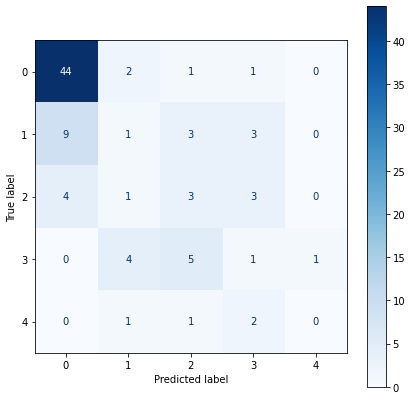

In [71]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(rfm_cv, x_multi_test, y_multi_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [72]:
model = 'rfm_cv'
max_depth = rfm_cv.best_params_['max_depth']
criterion = rfm_cv.best_params_['criterion']
min_samples_split = rfm_cv.best_params_['min_samples_split']
max_features = rfm_cv.best_params_['max_features']
class_weight = rfm_cv.best_params_['class_weight']

accuracy_in_sample = rfm_cv.best_score_
accuracy_out_sample = rfm_cv.score(x_multi_test, y_multi_test)
Precision = rfm_cv_report['weighted avg']['precision'] 
Recall = rfm_cv_report['weighted avg']['recall']
F1 = rfm_cv_report['weighted avg']['f1-score']

rfm_cv_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1, criterion, min_samples_split, max_features, class_weight )]
rfm_cv_results = pd.DataFrame(rfm_cv_temp)
rfm_cv_results.rename(columns={0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1', 7:'criterion', 8:'min_samples_split', 9:'max_features', 10:'class_weight'}, inplace = True)
rfm_cv_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1,criterion,min_samples_split,max_features,class_weight
0,rfm_cv,11,0.59911,0.544444,0.471876,0.544444,0.503402,entropy,4,sqrt,balanced


### 9 All Results

In [73]:
Results = pd.DataFrame()

In [74]:
dtb_basic_results
dtm_cv_results
dtb_basic_results
dtm_cv_results
rfb_basic_results
rfb_cv_results
rfm_basic_results
rfm_cv_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1,criterion,min_samples_split,max_features,class_weight
0,rfm_cv,11,0.59911,0.544444,0.471876,0.544444,0.503402,entropy,4,sqrt,balanced


In [75]:
Results_binary = pd.DataFrame()
Results_binary = Results_binary.append(dtb_basic_results)
Results_binary = Results_binary.append(dtb_cv_results)
Results_binary = Results_binary.append(rfb_basic_results)
Results_binary = Results_binary.append(rfb_cv_results)
Results_binary.to_excel('Results_binary_recall.xlsx')
Results_binary


,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1,criterion,min_samples_split,max_features,class_weight
0,dtb_basic,3,0.787440,0.822222,0.822333,0.822222,0.821868,gini (Default),2,sqrt (Default),None
0,dtb_cv,5,0.755517,0.800000,0.803704,0.800000,0.798190,entropy,10,sqrt,balanced
0,rfb_basic,3,0.879227,0.833333,0.840000,0.833333,0.831421,gini (Default),2,sqrt (Default),None
0,rfb_cv,7,0.835695,0.833333,0.836308,0.833333,0.832184,entropy,2,sqrt,balanced


In [76]:
Results_multi  = pd.DataFrame()
Results_multi = Results_multi.append(dtm_basic_results)
Results_multi = Results_multi.append(dtm_cv_results)
Results_multi = Results_multi.append(rfm_basic_results)
Results_multi = Results_multi.append(rfm_cv_results)
Results_multi.to_excel('Results_multi_recall.xlsx')
Results_multi

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1,criterion,min_samples_split,max_features,class_weight
0,dtm_basic,3,0.599034,0.566667,0.452222,0.566667,0.484485,gini (Default),2,sqrt (Default),None
0,dtm_cv,13,0.512118,0.533333,0.563688,0.533333,0.536949,gini,2,sqrt,balanced
0,rfm_basic,3,0.705314,0.566667,0.398836,0.566667,0.467371,gini (Default),2,sqrt (Default),None
0,rfm_cv,11,0.599110,0.544444,0.471876,0.544444,0.503402,entropy,4,sqrt,balanced


In [77]:
GridSearchResults_Params = pd.DataFrame()
GridSearchResults_Params = GridSearchResults_Params.append(dtb_cv_sp)
GridSearchResults_Params = GridSearchResults_Params.append(dtm_cv_sp)
GridSearchResults_Params = GridSearchResults_Params.append(rfb_cv_sp)
GridSearchResults_Params = GridSearchResults_Params.append(rfm_cv_sp)
GridSearchResults_Params.to_excel('GridSearchResults_Params_recall.xlsx')

In [78]:
GridSearchResults_Params

,model,param_criterion,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,rank_test_score
0,dtb_cv,gini,1,sqrt,2,0.669803,313
1,dtb_cv,gini,1,sqrt,3,0.669803,313
2,dtb_cv,gini,1,sqrt,4,0.669803,313
3,dtb_cv,gini,1,sqrt,5,0.669803,313
4,dtb_cv,gini,1,sqrt,6,0.669803,313
...,...,...,...,...,...,...,...
331,rfm_cv,entropy,20,log2,3,0.578165,231
332,rfm_cv,entropy,20,log2,4,0.594232,31
333,rfm_cv,entropy,20,log2,5,0.587805,77
334,rfm_cv,entropy,20,log2,6,0.577971,239


In [79]:
GridSearchResults_Params = GridSearchResults_Params.sort_values(by=['rank_test_score'], ascending=True)
GridSearchResults_Params.head()

,model,param_criterion,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,rank_test_score
132,dtm_cv,gini,13,sqrt,2,0.512118,1
284,rfm_cv,entropy,11,log2,4,0.599110,1
278,rfm_cv,entropy,11,sqrt,4,0.599110,1
138,dtm_cv,gini,13,log2,2,0.512118,1
240,rfb_cv,entropy,7,sqrt,2,0.835695,1
